In [ ]:
'''
Momentum : Accelerate the SGD (Speedup the SGD) in the relevant direction and reduces oscillations(variance).

SGD without momentum : Update takes longer verticle steps[Slower Learnig] then horizontal steps[faster learning]
SGD without momentum : Update takes longer horizontal steps[Fatser Learnig] then verticle steps[Slower learning]

'''

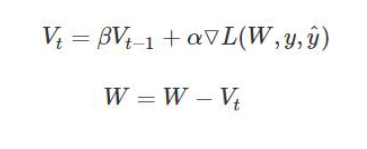

In [ ]:
'''

Varibales in momentum Gradient Descent
    - V  : velocity 
    - β (constant) :  Friction coefficient/smoothing constant which helps in controlling the value of V 
                      and avoids overshooting the minima and simultaneously allowing faster convergence
                      
    - V : Hyperparameter
    - vw = momentum * vw - lr * dtheta0
    - theta0 = theta0 + vw

'''

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

x = [30, 35, 37, 59, 70, 76, 88, 100 ]
y = [1100, 1423, 1377, 1800, 2304, 2588, 3495, 4839]

x = np.reshape(x,(-1,1))
y = np.reshape(y,(-1,1))

scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

n = len(y)
learningrate = 0.1

In [29]:
theta0 = 1.0
theta1 = 0.0

lr = 0.1

max_epochs = 100

loss_history_mom = []
w_history_mom = []
b_history_mom = []
iteration_mom = []
momentum = 0.2
vw = 0.0
vb = 0.0

for epoch in range(max_epochs):
    
    iteration_mom.append(epoch)
    
    if(epoch %20 ==0):
        
        print("Epoch:",epoch)
       
        print("\ttheta0:{0} \n\ttheta1:{1}".format(theta0,theta1))
    
    # Compute cost Function
    n = len(y)
    
    # Inference : find y_pred
    predicted = theta0 * x + theta1
    
    cost = (1/n)*np.sum(np.square(y - predicted))
    
    loss_history_mom.append(cost)
    
     # loss_derivative
    dtheta0 = np.mean((predicted -  y) * x)
    dtheta1 = np.mean(predicted - y)
    
    if(epoch %20 ==0):
        
        print("\tLoss :",cost)
        
        print("\tmomentum:{1} and lr:{2} and dtheta0:{3} and dtheta1:{4}".format(_,momentum,lr,dtheta0,dtheta1))
    
        print("\tvw:{0} and vb:{1}".format(vw,vb))
    
    # weights_update Momentum
    vw = momentum * vw - lr * dtheta0
    theta0 = theta0 + vw
    
    vb = momentum * vb - lr * dtheta1
    theta1 = theta1 + vb


Epoch: 0
	theta0:1.0 
	theta1:0.0
	Loss : 6998086.536096938
	momentum:0.2 and lr:0.1 and dtheta0:-1466.8174744897958 and dtheta1:-2365.2946428571427
	vw:0.0 and vb:0.0
Epoch: 20
	theta0:1463.419987769333 
	theta1:1707.1821198766875
	Loss : 523603.45148619777
	momentum:0.2 and lr:0.1 and dtheta0:-208.37087800805057 and dtheta1:7.810864307365819
	vw:27.62014266381827 and vb:1.3114931791231532
Epoch: 40
	theta0:1872.115855298555 
	theta1:1577.5737906998359
	Loss : 374761.50210857164
	momentum:0.2 and lr:0.1 and dtheta0:-132.94678270237412 and dtheta1:64.30511766614205
	vw:16.914219903371905 and vb:-8.09673899818429
Epoch: 60
	theta0:2167.3666311546517 
	theta1:1430.6481615834512
	Loss : 288116.4422330728
	momentum:0.2 and lr:0.1 and dtheta0:-102.72646956622863 and dtheta1:51.82403826994437
	vw:13.043921257184822 and vb:-6.5779592391722375
Epoch: 80
	theta0:2396.745584708215 
	theta1:1314.8073756192505
	Loss : 235511.10841910078
	momentum:0.2 and lr:0.1 and dtheta0:-80.02025587714154 and d

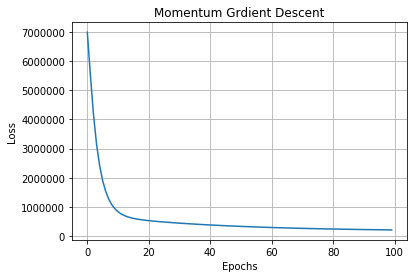

In [30]:
plt.plot(iteration_mom,loss_history_mom)
plt.title("Momentum Grdient Descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()